In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Zadatak 1.

Razmotrite jedan neuron koji ima samo jedan ulaz. Njegov izlaz tada će biti određen izrazom:
$$y=\frac{1}{1+\frac{|x-w|}{|s|}}$$
Pretpostavite da je u neuron pohranjena vrijednost $w=2$. Nacrtajte na istom grafu ovisnost $y(x;w=2)$ za tri slučaja: za $s=1$, za $s=0.25$ te za $s=4$ (svaku različitom bojom ili stilom linije). Za raspon apscise uzmite interval $[-8, 10]$.

Razumijete li sada kako s utječe na izlaz neurona $y$? Kako će izgledati izlaz neurona koji ima dva ulaza i što se tada kontrolira parametrima $s_1$ i $s_2$?

In [2]:
def similarityNeuron(x, w, s):
    return 1 / (1 + abs(x - w) / abs(s))

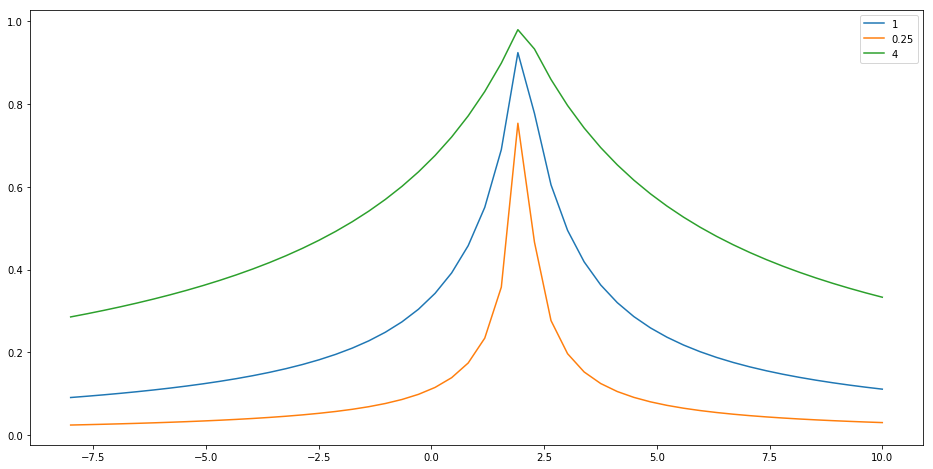

In [3]:
x = np.linspace(-8, 10)
ss = [1, 0.25, 4]
plt.figure(figsize=(16, 8))
for s in ss:
    plt.plot(x, similarityNeuron(x, 2, s), label=s)
plt.legend()

#Zadatak 2. 
Iskoristite neki gotov program (ili napišite vlastiti program, što god Vam je lakše) kako biste dobili 2D prikaz podataka koje ste dobili za učenje (zad7-dataset.txt). Pri to me uzorke različitih razreda prikažite ili različitim simbolom (npr. kvadratić, trokutić, kružić) ili različitom bojom. Ovu sliku spremite kao dio Vaše dokumentacije. Ako ste koristili gotov program, navedite naziv programa. Proučite dobiveni prikaz. Postoji li kakav uzorak u tim podatcima? Jesu li razredi međusobno linearno odvojivi?

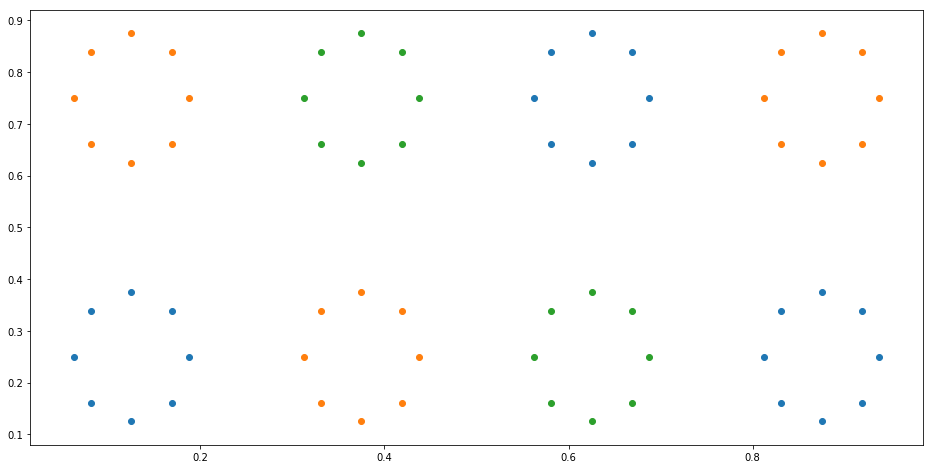

In [4]:
f = open('datasets/dataset-7.txt', 'r')
lines = np.array([[float(x) for x in line.strip().split('\t')] for line in f.readlines()])
x = lines[:, :2]
y = lines[:, 2:]
f.close()
plt.figure(figsize=(16, 8))
for i in range(0, 3):
    plt.scatter(x[y[:, i] == 1, 0], x[y[:, i] == 1, 1])

# Zadatak 3

Kada biste morali ručno odrediti vrijednosti svih parametara upravo zadane neuronske mreže, na koje biste ih vrijednosti postavili i zašto? Čime biste se vodili prilikom određivanja parametara neurona skrivenog sloja a čime prilikom određivanja parametara neurona izlaznog sloja? Nacrtajte tu neuronsku mrežu i na njoj prikažite vrijednosti svih parametara.

![mreza](lab7-zad3-mreza.jpg)

> Parametri w skrivenog sloja trebali bi odgovarati centrima grupica. Tako svaki neuron 2. sloja odgovara jednoj grupici. Parametri izlaznog sloja trebaju biti oko 1 za grupe koje odgovaraju njegovoj klasi, a oko 0 za sve ostale

# Zadatak 4. 

Naučite optimalne parametre mreže arhitekture __2 × 8 × 3__.
Nacrtajte novu sliku na kojoj se vide svi ulazni uzorci s indikacijom razreda te uzorci koje je GA naučio za svaki neuron tipa 1. Prokomentirajte gdje se nalaze naučeni uzorci i je li to u skladu s očekivanjem. Kakve je vrijednosti parametara _si_ naučio GA? Jesu li iste za _x_ i _y_ komponentu ili su različite? 
Objasnite! 
Nacrtajte novu sliku na kojoj se vide svi neuroni neuronske mreče, pozicije koje su naučene u neuronima tipa 1 te vrijednosti težina za neurone tipa 2. Uočavate li kakvu pravilnost u tim težinama? Možete li je objasniti?

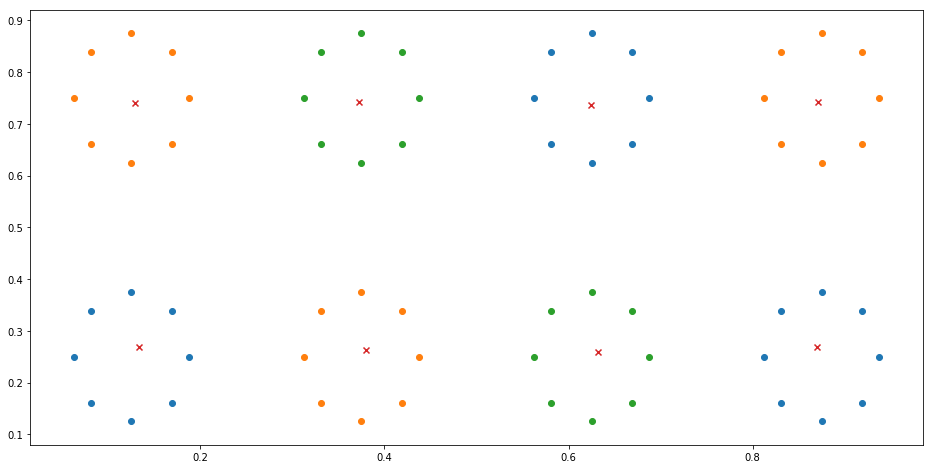

In [5]:
f = open('datasets/dataset-7.txt', 'r')
lines = np.array([[float(x) for x in line.strip().split('\t')] for line in f.readlines()])
x = lines[:, :2]
y = lines[:, 2:]
f.close()
plt.figure(figsize=(16, 8))
for i in range(0, 3):
    plt.scatter(x[y[:, i] == 1, 0], x[y[:, i] == 1, 1])
z = np.array([
[0.8698602238183872, 0.26875241536564665],
[0.12946492216540043, 0.7406172041951553],
[0.624208523062177, 0.7371779014061914],
[0.6315081752373182, 0.2598364595145921],
[0.3795217516632915, 0.26324743292093233],
[0.13292813898595393, 0.2691621494266979],
[0.3728009561529645, 0.7420904310522765],
[0.8709597133819931, 0.7419416593136587]])
plt.scatter(z[:, 0], z[:, 1], marker='x')

> Naučeni uzorci su u skladu s očekivanjem. Parametri si su naučeni na vrijednosti oko 0.15, s time da nisu jednaki za x i y komponentu. To je zato što su grupice primjera gušće na x osi pa s za x os treba biti strmiji.

![mreza](lab7-zad4-mreza.jpg)

> Težine izlaznog sloja istrenirale su se tako da je večina težina veliki negativan broj, dok su one koje odgovaraju traženim grupama velik pozitivan broj

# Zadatak 5. 

Naučite optimalne parametre mreže arhitekture __2×8×4×3__. 
Je li postupak učenja trajao dulje ili kraće u odnosu na prethodnu arhitekturu?
Možte li objasniti zašo?
Pogledajte naučene parametre u neuronima tipa 1 za ovaj slučaj. Možete li ih objasniti?

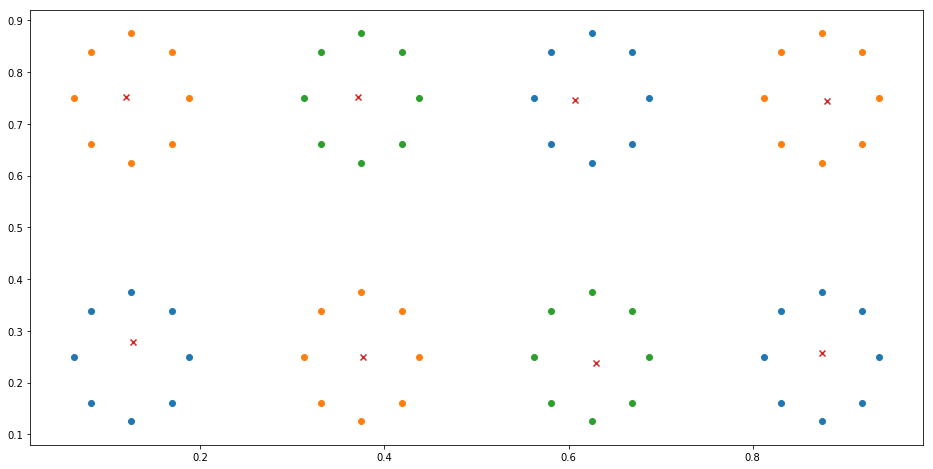

In [10]:
f = open('datasets/dataset-7.txt', 'r')
lines = np.array([[float(x) for x in line.strip().split('\t')] for line in f.readlines()])
x = lines[:, :2]
y = lines[:, 2:]
f.close()
plt.figure(figsize=(16, 8))
for i in range(0, 3):
    plt.scatter(x[y[:, i] == 1, 0], x[y[:, i] == 1, 1])
z = np.array([
[0.8752748935235717, 0.2575363144655579],
[0.6065080562265222, 0.7458077701013792],
[0.37178340692231127, 0.7520900879142185],
[0.11969130809826173, 0.7514255550975445],
[0.12732733306224336, 0.2783413393554487],
[0.37692764279225044, 0.250495372921127],
[0.6298976895391484, 0.23748480198650335],
[0.8813045798869117, 0.7439432787173679]])
plt.scatter(z[:, 0], z[:, 1], marker='x')

> Postupak učenja je trajao kraće.

# Zadatak 6. 

Možete li dobiti ispravnu klasifikaciju svih uzoraka u arhitekturi koja ima N1 < 8? 
Provjerite to na arhitekturi __2 × 6 × 4 × 3__. Na kraju (uspješnog ili neuspješnog) postupka učenja pogledajte za najbolje rješenje parametre u neuronima tipa 1 za ovaj slučaj. Što smo izgubili u odnosu na mrežu iz zadatka 4?

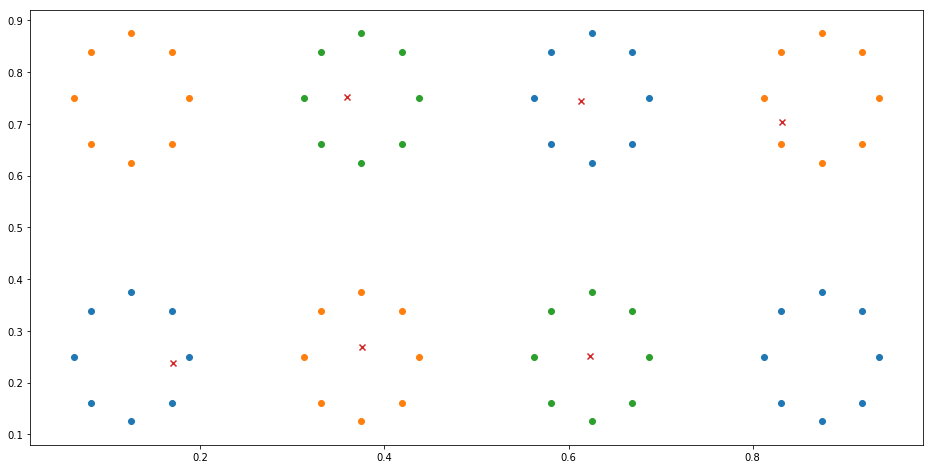

In [11]:
f = open('datasets/dataset-7.txt', 'r')
lines = np.array([[float(x) for x in line.strip().split('\t')] for line in f.readlines()])
x = lines[:, :2]
y = lines[:, 2:]
f.close()
plt.figure(figsize=(16, 8))
for i in range(0, 3):
    plt.scatter(x[y[:, i] == 1, 0], x[y[:, i] == 1, 1])
z = np.array([
[0.6130916678452256, 0.7443300831674473],
[0.1700093688854335, 0.23848938359775967],
[0.6233972417942679, 0.25067707616859547],
[0.8321208521223101, 0.7042671393105573],
[0.37586706171553014, 0.26828790814624026],
[0.35937268593230565, 0.7510600852740239]])
plt.scatter(z[:, 0], z[:, 1], marker='x')

> Postupak učenja je uspio naučiti mrežu da uspješno klasificira svih 64 primjera